# Traffic sign detection
The goal of this project is to classify 20 different types of Traffic sign commonly used around the world. The types are following: <br/>
1. Construction Signs
2. Hospital Signs
3. Informational Signs
4. Lane Control Signs
5. Motorway Signs
6. Parking Signs
7. Pedestrian Crossing Signs
8. Pedestrian Signs
9. Priority Signs
10. Prohibitory Signs
11. Railroad Signs
12. Regulatory Signs
13. Regulatory Signs for Bicycles
14. Roundabout Signs
15. School Zone Signs
16. Speed Limit Signs
17. Tourist Information Signs
18. Warning Signs


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 111.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Mastercourse_Project/Traffic sign detection

/content/drive/MyDrive/Mastercourse_Project/Traffic sign detection


In [ ]:
traffic_sign_label=[
    "Regulatory Signs",
    "Warning Signs",
    "Prohibitory Signs",
    "Informational Signs",
    "Construction Signs",
    "School Zone Signs",
    "Regulatory Signs for Bicycles",
    "Railroad Signs",
    "Pedestrian Signs",
    "Motorway Signs",
    "Speed Limit Signs",
    "Priority Signs",
    "Lane Control Signs",
    "Destination Signs",
    "Construction Work Signs",
    "Roundabout Signs",
    "Pedestrian Crossing Signs",
    "Parking Signs:",
    "Hospital Signs",
    "Tourist Information Signs",

]
len(traffic_sign_label)

20

In [ ]:
images = search_images_ddg(traffic_sign_label[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://i.pinimg.com/736x/7d/8d/9a/7d8d9a9930615a04fef91f33b3ddbf20--regulatory-signs-diorama.jpg'

In [ ]:
data_path = "traffic_sign_data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for traffic_sign_type in traffic_sign_label:

  dest = f"{data_path}/{traffic_sign_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    traffic_image_urls = search_images_ddg(traffic_sign_type)
    download_images(dest, urls = traffic_image_urls)

  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#3774) [Path('traffic_sign_data/Regulatory Signs/0cb623bd-f389-411a-8325-5e1be696977f.jpg'),Path('traffic_sign_data/Regulatory Signs/26a32566-2440-418c-a4c4-6d9998f7e449.jpg'),Path('traffic_sign_data/Regulatory Signs/813ee338-44b0-4df9-8d91-6c81ab84f69d.jpg'),Path('traffic_sign_data/Regulatory Signs/b537bbed-cd54-4c60-b192-e1c4a1af2e2a.png'),Path('traffic_sign_data/Regulatory Signs/389d2478-9341-4587-abd2-dc0a35b84a76.jpg'),Path('traffic_sign_data/Regulatory Signs/be1687a3-fcd2-40d5-8854-ba9a5773040a.jpg'),Path('traffic_sign_data/Regulatory Signs/24a3dfbf-7179-4565-8443-b5c4cff6fbb0.jpg'),Path('traffic_sign_data/Regulatory Signs/9fa71bb1-fed2-46ff-9d69-65228ad71417.png'),Path('traffic_sign_data/Regulatory Signs/4aaca422-7bf7-4ab6-8da2-648432f2a076.JPG'),Path('traffic_sign_data/Regulatory Signs/60a5d681-6e11-45c4-ac56-d975bda8506e.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#123) [Path('traffic_sign_data/Regulatory Signs/ce3813ca-bc58-45d3-87f0-f92cd0dbdc7a.jpg'),Path('traffic_sign_data/Warning Signs/7d9c2f27-a1c2-45e5-85eb-9a769db96f79.jpg'),Path('traffic_sign_data/Warning Signs/fb31464d-f7a3-491d-ac4e-0ab5d4bcb018.jpg'),Path('traffic_sign_data/Warning Signs/398c6e91-c610-4f36-b8a2-6631fa74bd6a.svg'),Path('traffic_sign_data/Warning Signs/292c7da4-4c39-46e7-8649-78d09bdabcbf.png'),Path('traffic_sign_data/Warning Signs/5d79c567-cb1c-44b1-934f-5bf8bc7863f4.jpg'),Path('traffic_sign_data/Warning Signs/df420dac-3c88-4ae0-9f2f-9766cd3f5efb.jpg'),Path('traffic_sign_data/Warning Signs/8a92f6df-ec65-4eb8-a2f5-df0a75a64998.svg'),Path('traffic_sign_data/Prohibitory Signs/3378af36-e183-4dbd-851f-a4f24c1f0315.png'),Path('traffic_sign_data/Prohibitory Signs/841147e1-58e3-4b88-a4ad-021324b80926.jpg')...]

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.15, seed=10),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

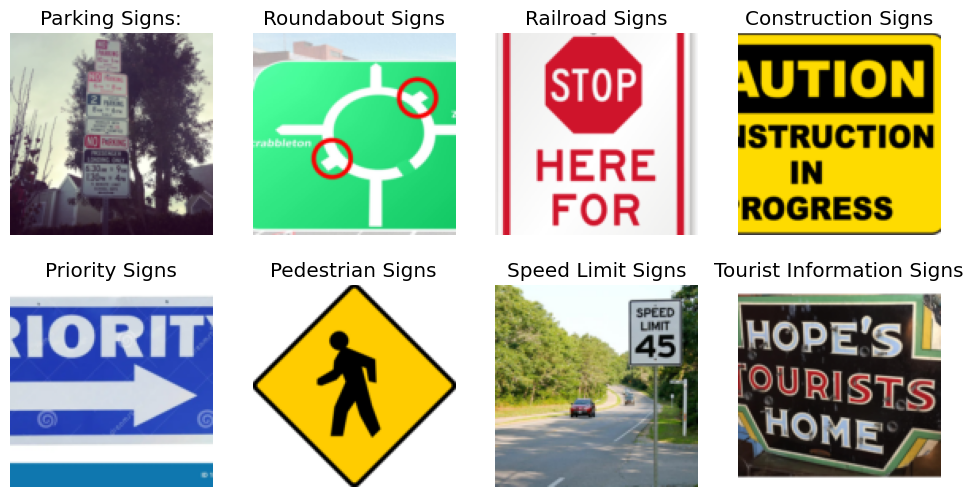

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

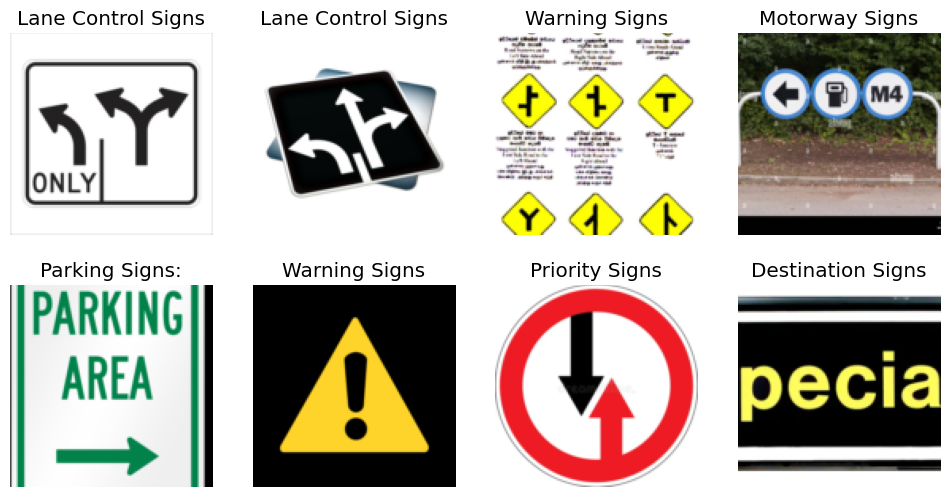

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

In [ ]:
try:
  dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
  dls = dblock.dataloaders(data_path)
  dls.valid.show_batch(max_n=4, nrows=1)
except:
  pass

In [ ]:
try:
   dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
   dls = dblock.dataloaders(data_path)
   dls.train.show_batch(max_n=8, nrows=2)
   torch.save(dls, "traffic_dataloader_v0.pkl")
except:
  pass